In [1]:
# two datasets, deciding on later which to take
# want to take in for suethe suicide part of first dataset
# ask ksenia if already scaling will be a problem for when integrating in features for regressio model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\leube\Downloads\gun_ownership_and_extra.csv", sep=';')
data

,FIP,Year,STATE,HFR,HFR_se,universl,permit,Fem_FS_S,Male_FS_S,BRFSS,GALLUP,GSS,PEW,HuntLic,GunsAmmo,BackChk,PewQChng,BS1,BS2,BS3
0,1,1980,Alabama,0.608,0.031,0,0,0.824324,0.833795,-9.0,0.55395,0.583632,-9.000000,0.291102,-0.509164,-9.000000,0,0.0,0.0,0.0
1,1,1981,Alabama,0.597,0.047,0,0,0.692308,0.831126,-9.0,-9.00000,-9.000000,-9.000000,0.294962,-0.618954,-9.000000,0,1.0,0.0,0.0
2,1,1982,Alabama,0.661,0.036,0,0,0.771739,0.821429,-9.0,-9.00000,0.655196,-9.000000,0.290545,-0.526692,-9.000000,0,2.0,0.0,0.0
3,1,1983,Alabama,0.586,0.038,0,0,0.688172,0.819277,-9.0,0.61144,-9.000000,-9.000000,0.284983,-0.713227,-9.000000,0,3.0,0.0,0.0
4,1,1984,Alabama,0.624,0.036,0,0,0.710000,0.775956,-9.0,-9.00000,0.626933,-9.000000,0.281622,-0.733305,-9.000000,0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,56,2012,Wyoming,0.597,0.029,0,0,0.375000,0.647482,-9.0,0.66206,-9.000000,0.622224,0.545627,2.973924,1.562481,0,12.0,12.0,8.0
1846,56,2013,Wyoming,0.613,0.032,0,0,0.529412,0.714286,-9.0,-9.00000,-9.000000,0.685266,0.542697,3.066252,1.638737,1,12.0,12.0,9.0
1847,56,2014,Wyoming,0.608,0.044,0,0,0.583333,0.666667,-9.0,-9.00000,-9.000000,-9.000000,0.538761,3.092854,1.603822,1,12.0,12.0,10.0
1848,56,2015,Wyoming,0.549,0.032,0,0,0.393939,0.661290,-9.0,-9.00000,-9.000000,0.611531,0.544356,2.910414,1.348323,1,12.0,12.0,11.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FIP        1850 non-null   int64  
 1   Year       1850 non-null   int64  
 2   STATE      1850 non-null   object 
 3   HFR        1850 non-null   float64
 4   HFR_se     1850 non-null   float64
 5   universl   1850 non-null   int64  
 6   permit     1850 non-null   int64  
 7   Fem_FS_S   1850 non-null   float64
 8   Male_FS_S  1850 non-null   float64
 9   BRFSS      1850 non-null   float64
 10  GALLUP     1850 non-null   float64
 11  GSS        1850 non-null   float64
 12  PEW        1850 non-null   float64
 13  HuntLic    1850 non-null   float64
 14  GunsAmmo   1850 non-null   float64
 15  BackChk    1850 non-null   float64
 16  PewQChng   1850 non-null   int64  
 17  BS1        1850 non-null   float64
 18  BS2        1850 non-null   float64
 19  BS3        1850 non-null   float64
dtypes: float

In [4]:
data.describe()

,FIP,Year,HFR,HFR_se,universl,permit,Fem_FS_S,Male_FS_S,BRFSS,GALLUP,GSS,PEW,HuntLic,GunsAmmo,BackChk,PewQChng,BS1,BS2,BS3
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1.850000e+03,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,29.320000,1998.000000,0.441002,0.034279,0.175135,0.221622,-0.051958,0.616725,-8.248315,-5.734210,-4.754127,-6.024545,0.371159,-6.486542e-12,-4.621622,0.108108,9.756757,6.000000,2.243243
std,15.627847,10.679965,0.144662,0.007292,0.380185,0.415450,1.958854,0.129041,2.550064,4.514067,4.683266,4.388225,0.280793,9.902172e-01,4.552270,0.310601,3.581862,5.061188,3.581862
min,1.000000,1980.000000,0.034000,0.018000,0.000000,0.000000,-9.000000,0.144928,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-3.466482e+00,-9.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1989.000000,0.366250,0.031000,0.000000,0.000000,0.235294,0.560104,-9.000000,-9.000000,-9.000000,-9.000000,0.246924,-6.498549e-01,-9.000000,0.000000,8.730000,0.270000,0.000000
50%,29.500000,1998.000000,0.462000,0.032000,0.000000,0.000000,0.352941,0.631413,-9.000000,-9.000000,-9.000000,-9.000000,0.341257,-3.303508e-02,-9.000000,0.000000,12.000000,6.000000,0.000000
75%,42.000000,2007.000000,0.547000,0.038000,0.000000,0.000000,0.487420,0.705409,-9.000000,0.433781,0.402183,0.346282,0.462227,4.225277e-01,-0.134125,0.000000,12.000000,11.730000,3.270000
max,56.000000,2016.000000,0.800000,0.047000,1.000000,1.000000,0.923077,0.873016,0.635250,0.795623,0.729886,0.734846,1.138084,3.934618e+00,2.822473,1.000000,12.000000,12.000000,12.000000


In [5]:
data = data[['Year','Fem_FS_S','Male_FS_S','GunsAmmo','BackChk']]

In [6]:
data

,Year,Fem_FS_S,Male_FS_S,GunsAmmo,BackChk
0,1980,0.824324,0.833795,-0.509164,-9.000000
1,1981,0.692308,0.831126,-0.618954,-9.000000
2,1982,0.771739,0.821429,-0.526692,-9.000000
3,1983,0.688172,0.819277,-0.713227,-9.000000
4,1984,0.710000,0.775956,-0.733305,-9.000000
...,...,...,...,...,...
1845,2012,0.375000,0.647482,2.973924,1.562481
1846,2013,0.529412,0.714286,3.066252,1.638737
1847,2014,0.583333,0.666667,3.092854,1.603822
1848,2015,0.393939,0.661290,2.910414,1.348323


In [7]:
def displots(data):
    import seaborn as sns
    import matplotlib.pyplot as plt
    numcol = list(data.describe().columns)
    for x in numcol:
        sns.displot(data, x=x)

In [8]:
def boxplots(data):
    import seaborn as sns
    import matplotlib.pyplot as plt
    numcol = list(data.describe().columns)
    for x in numcol:
        sns.boxplot(data = data, y=x)
        plt.title(x)
        plt.show()

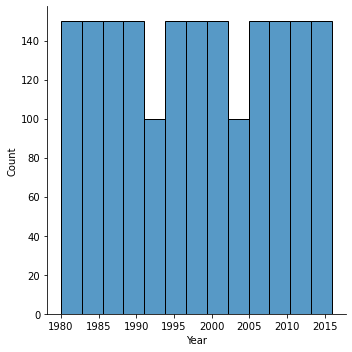

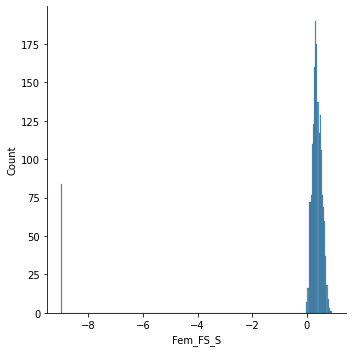

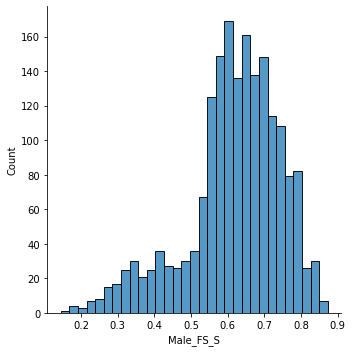

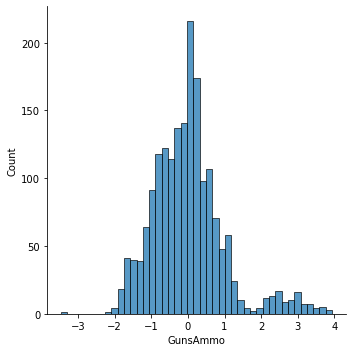

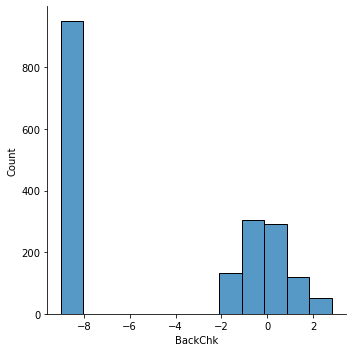

In [9]:
displots(data)

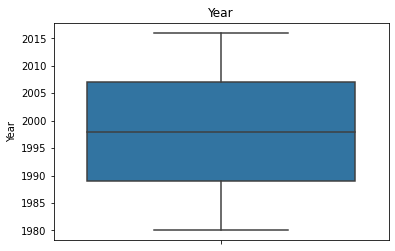

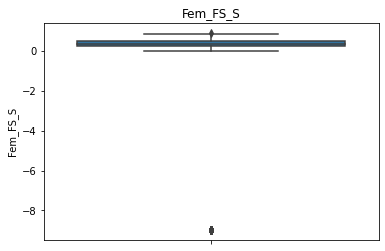

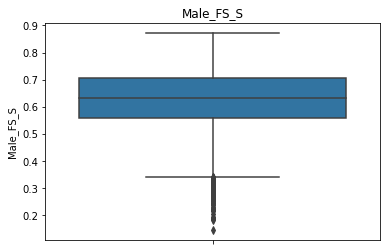

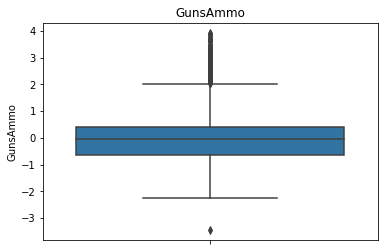

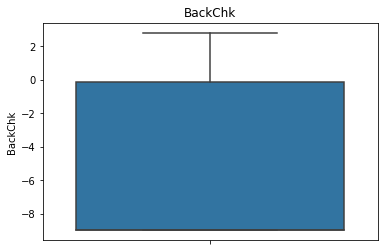

In [10]:
boxplots(data)

In [11]:
# a few outliers esecially for female suicide a very weird low value, theoretically though possible having very diffferent
# values for the different states, to different wepons torwards wepons, laws etc, also in this case I do not need to do a model
# etc. where these outliers could mess up my training set

# when grouping by year I might just take median instead of mean so the results are not affecte as much from outliers

In [12]:
pivot = pd.pivot_table(data=data,index='Year',values=['Fem_FS_S','Male_FS_S','GunsAmmo','BackChk'], aggfunc='median')

In [13]:
pivot.reset_index(inplace=True)

In [14]:
# lets get rid of preictions we dont need, year wise
finito = pivot[pivot['Year']>=2008]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


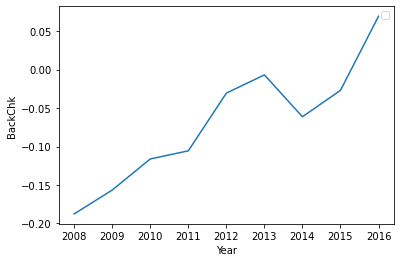

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


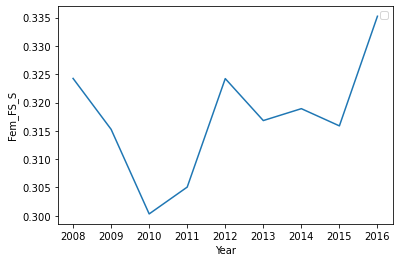

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


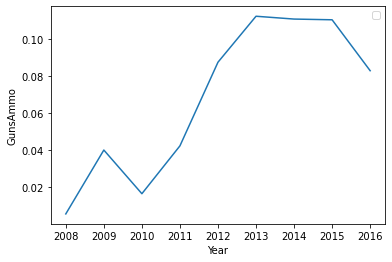

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


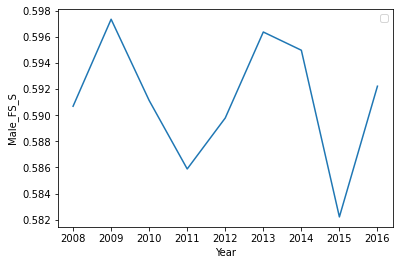

In [15]:
for x in list(finito.describe().columns)[1:]:
    sns.lineplot(data=finito,x='Year',y=x)
    plt.legend()
    plt.show()

In [16]:
# male suicide level no real increase over time, gun ownership and female suicide strong increase, as well as background checks
# 

In [17]:
# second gun ownership dataset, total amount of firearms processed by the ATF
data2 = pd.read_csv(r"C:\Users\leube\Downloads\National_Firearms_Act_Firearms_Processed_by_Form_Type.csv")
data2

,Calendar_Year,ATF_Form_1,ATF_Form_2,ATF_Form_3,ATF_Form_4,ATF_Form_5,ATF_Form_9,Total
0,1990,399,"66,084","23,149","7,024","54,959","21,725","173,340"
1,1991,524,"80,619","19,507","5,395","44,146","40,387","190,578"
2,1992,351,"107,313","26,352","6,541","45,390","22,120","208,067"
3,1993,310,"70,342","22,071","7,388","60,193","24,041","184,345"
4,1994,"1,076","97,665","27,950","7,600","67,580","34,242","236,113"
5,1995,"1,226","95,061","18,593","8,263","60,055","31,258","214,456"
6,1996,"1,174","103,511","16,931","6,418","72,395","40,439","240,868"
7,1997,855,"110,423","18,371","7,873","70,690","36,284","244,496"
8,1998,"1,093","141,101","27,921","10,181","93,135","40,221","313,652"
9,1999,"1,071","137,373","28,288","11,768","95,554","28,128","302,182"


In [18]:
# all we need is year and total number of registered and processed weapons
dataweap = data2[['Calendar_Year','ATF_Form_2']]
dataweap

,Calendar_Year,ATF_Form_2
0,1990,"66,084"
1,1991,"80,619"
2,1992,"107,313"
3,1993,"70,342"
4,1994,"97,665"
5,1995,"95,061"
6,1996,"103,511"
7,1997,"110,423"
8,1998,"141,101"
9,1999,"137,373"


In [19]:
dataweap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Calendar_Year  25 non-null     int64 
 1   ATF_Form_2     25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [20]:
dataweap['ATF_Form_2'] = dataweap['ATF_Form_2'].apply(pd.to_numeric)

# wrongnumber format in string here

ValueError: Unable to parse string "66,084" at position 0

In [21]:
newval = []
for x in list(dataweap['ATF_Form_2'].values):
    new = x.replace(',','')
    newval.append(new)

In [22]:
newval

['66084',
 '80619',
 '107313',
 '70342',
 '97665',
 '95061',
 '103511',
 '110423',
 '141101',
 '137373',
 '141763',
 '145112',
 '162321',
 '156620',
 '83483',
 '65865',
 '188134',
 '296267',
 '424743',
 '371920',
 '296375',
 '530953',
 '484928',
 '477567',
 '591388']

In [24]:
dataweap['ATF_Form_2'] = newval
#del dataweap['Total']

C:\Users\leube\AppData\Local\Temp\ipykernel_21652\1419645428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataweap['ATF_Form_2'] = newval


In [25]:
dataweap['ATF_Form_2'] = dataweap['ATF_Form_2'].apply(pd.to_numeric) 

C:\Users\leube\AppData\Local\Temp\ipykernel_21652\3064245724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataweap['ATF_Form_2'] = dataweap['ATF_Form_2'].apply(pd.to_numeric)


In [26]:
dataweap = dataweap[dataweap['Calendar_Year']>=2002]

<AxesSubplot:xlabel='Calendar_Year', ylabel='ATF_Form_2'>

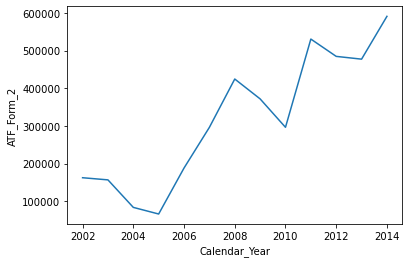

In [27]:
sns.lineplot(data=dataweap,x='Calendar_Year',y='ATF_Form_2')

In [28]:
# strong increase of total registered weapons by the ATF

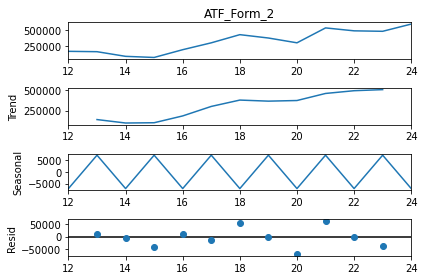

In [29]:
# lets make forcast until year 2018

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(dataweap['ATF_Form_2'],model='additive', period=2)
decompose.plot()
plt.show()

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\leube\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


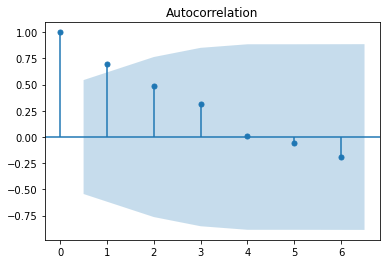

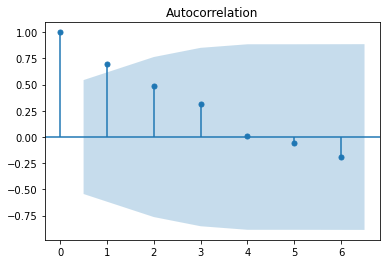

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dataweap['ATF_Form_2'], lags=6)

In [31]:
# no auto correlation

# stationary?
from statsmodels.tsa.stattools import adfuller
adft = adfuller(dataweap['ATF_Form_2'],autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

     Values                       Metric
0 -1.086144              Test Statistics
1  0.720566                      p-value
2  4.000000             No. of lags used
3  8.000000  Number of observations used
4 -4.665186          critical value (1%)
5 -3.367187          critical value (5%)
6 -2.802961         critical value (10%)


In [32]:
# data not stationary due to high p value, so lets either make ot stationary first or use arima doing this step for us

In [33]:
len(dataweap)

13

In [34]:
train = dataweap['ATF_Form_2'][:11]
test = dataweap['ATF_Form_2'][11:]

In [35]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False,  m=12)
model.fit(train)

C:\Users\leube\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=311.919, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=292.141, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=309.575, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=294.167, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=294.300, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=295.546, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=291.560, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=297.829, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=293.377, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=292.983, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.848, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.890 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [36]:
test

23    477567
24    591388
Name: ATF_Form_2, dtype: int64

In [37]:
predtest = model.predict(n_periods=len(test))
predtest = pd.DataFrame(predtest,index = test.index,columns=['Prediction'])

In [38]:
test

23    477567
24    591388
Name: ATF_Form_2, dtype: int64

In [39]:
from sklearn.metrics import r2_score
r2_score(predtest,test)

# very bad results due to small amount of data, better resuls with linear regression??

# first lets try building timeseries with all the data from previous years

-58.841402849827126

In [40]:
dataweapall = data2[['Calendar_Year','ATF_Form_2']]

In [41]:
dataweapall

,Calendar_Year,ATF_Form_2
0,1990,"66,084"
1,1991,"80,619"
2,1992,"107,313"
3,1993,"70,342"
4,1994,"97,665"
5,1995,"95,061"
6,1996,"103,511"
7,1997,"110,423"
8,1998,"141,101"
9,1999,"137,373"


In [43]:
newval = []
for x in list(dataweapall['ATF_Form_2'].values):
    new = x.replace(',','')
    newval.append(new)
dataweapall['ATF_Form_2'] = newval
dataweapall['ATF_Form_2'] = dataweapall['ATF_Form_2'].apply(pd.to_numeric) 

C:\Users\leube\AppData\Local\Temp\ipykernel_21652\3327810381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataweapall['ATF_Form_2'] = newval
C:\Users\leube\AppData\Local\Temp\ipykernel_21652\3327810381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataweapall['ATF_Form_2'] = dataweapall['ATF_Form_2'].apply(pd.to_numeric)


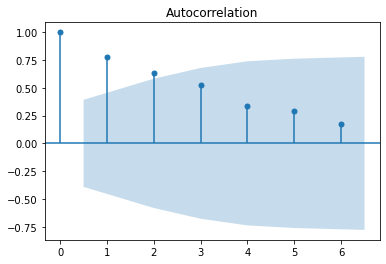

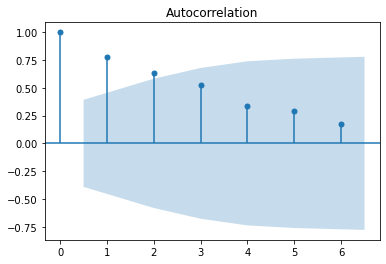

In [45]:
#autocorrelation?

plot_acf(dataweapall['ATF_Form_2'], lags=6)

utocorrelation with first 2 lags

In [46]:
# stationary ?
adft = adfuller(dataweapall['ATF_Form_2'],autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0   1.748926              Test Statistics
1   0.998242                      p-value
2   7.000000             No. of lags used
3  17.000000  Number of observations used
4  -3.889266          critical value (1%)
5  -3.054358          critical value (5%)
6  -2.666984         critical value (10%)


not stationary, H0 excepted due to high p value

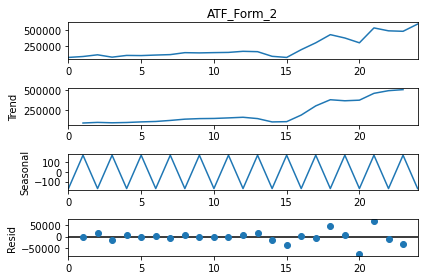

In [48]:
# decomposition

decompose = seasonal_decompose(dataweapall['ATF_Form_2'],model='additive', period=2)
decompose.plot()
plt.show()

In [49]:
split = round((len(dataweapall)*0.8))

train = dataweapall['Total'][:split]
test = dataweapall['Total'][split:]

KeyError: 'Total'

In [50]:
from pmdarima.arima import auto_arima
model2 = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False,  m=12)
model2.fit(train)

C:\Users\leube\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=311.919, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=292.141, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=309.575, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=294.167, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=294.300, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=295.546, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=291.560, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=297.829, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=293.377, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=292.983, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.848, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.778 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [51]:
test

23    477567
24    591388
Name: ATF_Form_2, dtype: int64

In [52]:
predtest = model2.predict(n_periods=len(test))
predtest = pd.DataFrame(predtest,index = test.index,columns=['Prediction'])

r2_score(predtest,test)

# very bad results due to small amount of data, better resuls with linear regression??

# first lets try building timeseries with all the data from previous years

-58.841402849827126

In [53]:
predtest['Prediction']

23    437371.818775
24    401972.556844
Name: Prediction, dtype: float64

In [54]:
#linear regression
dataweap

,Calendar_Year,ATF_Form_2
12,2002,162321
13,2003,156620
14,2004,83483
15,2005,65865
16,2006,188134
17,2007,296267
18,2008,424743
19,2009,371920
20,2010,296375
21,2011,530953


<AxesSubplot:xlabel='Calendar_Year', ylabel='ATF_Form_2'>

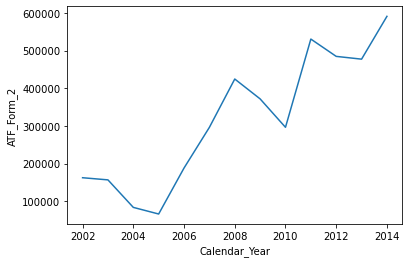

In [55]:
sns.lineplot(data=dataweap,x='Calendar_Year',y='ATF_Form_2')

In [56]:
import statsmodels.api as sm

X = sm.add_constant(dataweap['Calendar_Year'])
Y = dataweap['ATF_Form_2']
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [57]:
predframe = pd.DataFrame({'Year':dataweap['Calendar_Year'],'ATF_Form_2':predictions})

In [60]:
predframe

,Year,ATF_Form_2
12,2002,71395.604396
13,2003,112452.285714
14,2004,153508.967033
15,2005,194565.648352
16,2006,235622.329670
17,2007,276679.010989
18,2008,317735.692308
19,2009,358792.373626
20,2010,399849.054945
21,2011,440905.736264


<AxesSubplot:xlabel='Year', ylabel='ATF_Form_2'>

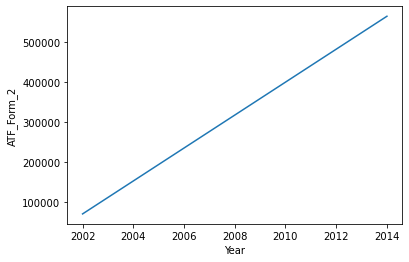

In [58]:
sns.lineplot(data=predframe,x='Year',y='ATF_Form_2')

In [61]:
# does in deed show the general trend, therefor better suited to predict future vaues than first attempt of using timeseries

In [62]:
listyear = [2015,2016,2017,2018]
newyear = pd.DataFrame({'Calendar_Year':listyear})
newX = sm.add_constant(newyear['Calendar_Year'])
newyear['ATF_Form_2'] = results.predict(newX)
allyear = pd.concat([dataweap,newyear],axis=0,ignore_index=True)

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [63]:
allyear

,Calendar_Year,ATF_Form_2
0,2002,162321.000000
1,2003,156620.000000
2,2004,83483.000000
3,2005,65865.000000
4,2006,188134.000000
5,2007,296267.000000
6,2008,424743.000000
7,2009,371920.000000
8,2010,296375.000000
9,2011,530953.000000


<AxesSubplot:xlabel='Calendar_Year', ylabel='ATF_Form_2'>

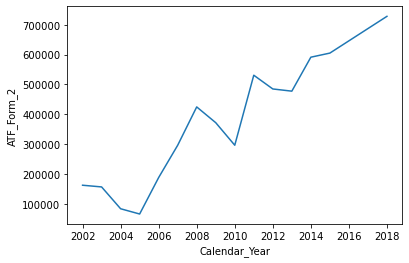

In [64]:
sns.lineplot(data=allyear,x='Calendar_Year',y='ATF_Form_2')

In [65]:
# try it with all data
Xa = sm.add_constant(dataweapall['Calendar_Year'])
Ya = dataweapall['ATF_Form_2']
model = sm.OLS(Ya,Xa)
resultsa = model.fit()
predictionsa = results.predict(Xa)

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [66]:
listyear = [2015,2016,2017,2018]
newyear = pd.DataFrame({'Calendar_Year':listyear})
newX = sm.add_constant(newyear['Calendar_Year'])
newyear['ATF_Form_2'] = resultsa.predict(newX)
allyeara = pd.concat([dataweapall,newyear],axis=0, ignore_index=True)

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [67]:
allyear

,Calendar_Year,ATF_Form_2
0,2002,162321.000000
1,2003,156620.000000
2,2004,83483.000000
3,2005,65865.000000
4,2006,188134.000000
5,2007,296267.000000
6,2008,424743.000000
7,2009,371920.000000
8,2010,296375.000000
9,2011,530953.000000


In [68]:
newval = []
for x in list(allyeara['ATF_Form_2'].values):
    x = str(x)
    new = x.replace(',','')
    newval.append(new)
allyeara['ATF_Form_2'] = newval
allyeara['ATF_Form_2'] = allyeara['ATF_Form_2'].apply(pd.to_numeric) 

In [69]:
allyeara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Calendar_Year  29 non-null     int64  
 1   ATF_Form_2     29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


In [70]:
allyeara

,Calendar_Year,ATF_Form_2
0,1990,66084.00
1,1991,80619.00
2,1992,107313.00
3,1993,70342.00
4,1994,97665.00
5,1995,95061.00
6,1996,103511.00
7,1997,110423.00
8,1998,141101.00
9,1999,137373.00


In [71]:
allyeara.set_index('Calendar_Year',inplace=True)

In [72]:
allyeara.reset_index(inplace=True)

In [73]:
allyeara

,Calendar_Year,ATF_Form_2
0,1990,66084.00
1,1991,80619.00
2,1992,107313.00
3,1993,70342.00
4,1994,97665.00
5,1995,95061.00
6,1996,103511.00
7,1997,110423.00
8,1998,141101.00
9,1999,137373.00


<AxesSubplot:xlabel='Calendar_Year', ylabel='ATF_Form_2'>

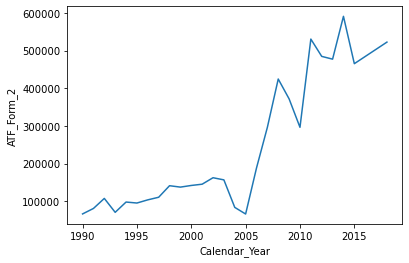

In [74]:
sns.lineplot(data=allyeara,x='Calendar_Year',y='ATF_Form_2')

In [75]:
# taken into account more values, lets take the allyeara dataset

In [76]:
# lets rather make a time series prediction, now having updated using the right columns, we see an rather exponential development
# lets make a timeseries

In [77]:
dataweapall

,Calendar_Year,ATF_Form_2
0,1990,66084
1,1991,80619
2,1992,107313
3,1993,70342
4,1994,97665
5,1995,95061
6,1996,103511
7,1997,110423
8,1998,141101
9,1999,137373


In [79]:
from autots import AutoTS, load_daily
model = AutoTS(
    forecast_length=5,
    frequency='infer',
    prediction_interval=0.4,
    ensemble=None,
    model_list="fast",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=3,
    num_validations=3,
    validation_method="backwards",
    #min_allowed_train_percent=0.6
)

In [80]:
model = model.fit(
    dataweapall,
    date_col='Calendar_Year',
    value_col='ATF_Form_2'
    #id_col='series_id' if long else None,
)

Inferred frequency is: N
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model DatepartRegression in generation 0 of 3
Model Number: 5 with model DatepartRegression in generation 0 of 3
Model Number: 6 with model DatepartRegression in generation 0 of 3


C:\Users\leube\anaconda4\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 3
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3440
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3449
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3452
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3421
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3407
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3419
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3501
Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3458
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3438
Epoch 10/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3463
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3440
Epoch 12/50
1/1 [==============================] - 0s 20ms/step - loss: 0

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 40 with model NVAR in generation 0 of 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 41 with model ConstantNaive in generation 0 of 3
Model Number: 42 with model LastValueNaive in generation 0 of 3
Model Number: 43 with model AverageValueNaive in generation 0 of 3
Model Number: 44 with model GLS in generation 0 of 3
Model Number: 45 with model SeasonalNaive in generation 0 of 3
Model Number: 46 with model GLM in generation 0 of 3
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 46: GLM
Model Number: 47 with model ETS in generation 0 of 3
Model Number: 48 with model VAR in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VAR') in model 48: VAR
Model Number: 49 with model VECM in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VECM') in model 49: VECM
Model Number: 50 with model WindowRegression in generation 0 of 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by RadiusNeighborsRegressor.') 

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

Model Number: 52 with model UnivariateMotif in generation 0 of 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 52: UnivariateMotif
Model Number: 53 with model MultivariateMotif in generation 0 of 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 53: MultivariateMotif
Model Number: 54 with model SectionalMotif in generation 0 of 3
Model Number: 55 with model NVAR in generation 0 of 3
Template Eval Error: LinAlgError('SVD did not converge') in model 55: NVAR
Model Number: 56 with model UnivariateMotif in generation 0 of 3
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 56: UnivariateMotif
Model Number: 57 with model DatepartRegression in generation 0 of 3
Epoch 1/50
3/3 [==============================] - 18s 26ms/step - loss: 38554.4609
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 38554.3984
Epoch 3/50
3/3 [==============================] - 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 62 with model VECM in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VECM') in model 62: VECM
Model Number: 63 with model MultivariateMotif in generation 0 of 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 63: MultivariateMotif
Model Number: 64 with model SectionalMotif in generation 0 of 3
Template Eval Error: ValueError('kth(=20) out of bounds (5)') in model 64: SectionalMotif
Model Number: 65 with model GLM in generation 0 of 3
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model SeasonalNaive in generation 0 of 3
Model Number: 67 with model NVAR in generation 0 of 3
Model Number: 68 with model MultivariateMotif in generation 0 of 3
Template Eval Error: ValueError('kth(=5) out of bounds (1)') in model 68: MultivariateMotif
Model Number: 69 with model SectionalMotif in generation 0 of 3
Template Eval Error: Exce

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 76 with model VAR in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VAR') in model 76: VAR
Model Number: 77 with model UnivariateMotif in generation 0 of 3
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 77: UnivariateMotif
Model Number: 78 with model SectionalMotif in generation 0 of 3
Template Eval Error: ValueError('kth(=100) out of bounds (2)') in model 78: SectionalMotif
Model Number: 79 with model ConstantNaive in generation 0 of 3
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 79: ConstantNaive
Model Number: 80 with model AverageValueNaive in generation 0 of 3
Model Number: 81 with model SeasonalNaive in generation 0 of 3
Model Number: 82 with model SectionalMotif in generation 0 of 3
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 82: SectionalMotif
Model Number: 83 with model SeasonalNaive in generation 0 of 3
Model Number: 84 with model SectionalMotif in g

Epoch 47/100
1/1 [==============================] - 0s 98ms/step - loss: 113498.9844 - val_loss: 238607.5938
Epoch 48/100
1/1 [==============================] - 0s 103ms/step - loss: 113257.2344 - val_loss: 238603.2188
Epoch 49/100
1/1 [==============================] - 0s 118ms/step - loss: 113394.5000 - val_loss: 238598.8750
Epoch 50/100
1/1 [==============================] - 0s 99ms/step - loss: 113446.3594 - val_loss: 238594.5000
Epoch 51/100
1/1 [==============================] - 0s 100ms/step - loss: 113315.8828 - val_loss: 238590.1250
Epoch 52/100
1/1 [==============================] - 0s 100ms/step - loss: 113345.5156 - val_loss: 238585.7500
Epoch 53/100
1/1 [==============================] - 0s 106ms/step - loss: 113449.5078 - val_loss: 238581.4062
Epoch 54/100
1/1 [==============================] - 0s 116ms/step - loss: 113388.7344 - val_loss: 238577.0312
Epoch 55/100
1/1 [==============================] - 0s 111ms/step - loss: 113330.1328 - val_loss: 238572.6875
Epoch 56/100

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 127 with model DatepartRegression in generation 1 of 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 128 with model GLS in generation 1 of 3
Model Number: 129 with model DatepartRegression in generation 1 of 3
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 129: DatepartRegression
Model Number: 130 with model ETS in generation 1 of 3
Model Number: 131 with model ETS in generation 1 of 3
ETS failed on ATF_Form_2 with ValueError('operands could not be broadcast together with shapes (0,) (19,) ')
Model Number: 132 with model ConstantNaive in generation 1 of 3
Model Number: 133 with model MultivariateMotif in generation 1 of 3
Template Eval Error: ValueError('kth(=5) out of bounds (5)') in model 133: MultivariateMotif
Model Number: 134 with model SeasonalNaive in generation 1 of 3
Model Number: 135 with model NVAR in generation 1 of 3
Model Number: 136 with model AverageValueNaive in generation 1 of 3
Model Number: 137 with model DatepartRegression in generation 1 of 3
Model Number: 138 with model DatepartRegression in genera

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


Model Number: 139 with model SeasonalNaive in generation 1 of 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 140 with model AverageValueNaive in generation 1 of 3
Model Number: 141 with model DatepartRegression in generation 1 of 3
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 83835.0781 - val_loss: 3697.4106
Epoch 2/50
1/1 [==============================] - 0s 111ms/step - loss: 123853.1641 - val_loss: 1678.3038
Epoch 3/50
1/1 [==============================] - 0s 110ms/step - loss: 41063.8633 - val_loss: 548.6064
Epoch 4/50
1/1 [==============================] - 0s 101ms/step - loss: 64192.3984 - val_loss: 59.0340
Epoch 5/50
1/1 [==============================] - 0s 96ms/step - loss: 39538.4180 - val_loss: 2.4273
Epoch 6/50
1/1 [==============================] - 0s 93ms/step - loss: 83672.7109 - val_loss: 119.1455
Epoch 7/50
1/1 [==============================] - 0s 102ms/step - loss: 48654.1055 - val_loss: 168.7490
Epoch 8/50
1/1 [==============================] - 0s 93ms/step - loss: 33528.2070 - val_loss: 347.1287
Epoch 9/50
1/1 [===================

C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 151 with model NVAR in generation 1 of 3
Model Number: 152 with model LastValueNaive in generation 1 of 3
Model Number: 153 with model LastValueNaive in generation 1 of 3
Model Number: 154 with model GLS in generation 1 of 3
Model Number: 155 with model ConstantNaive in generation 1 of 3
Model Number: 156 with model LastValueNaive in generation 1 of 3
Model Number: 157 with model SectionalMotif in generation 1 of 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 157: SectionalMotif
Model Number: 158 with model SeasonalNaive in generation 1 of 3
Model Number: 159 with model GLS in generation 1 of 3
Model Number: 160 with model LastValueNaive in generation 1 of 3
Model Number: 161 with model LastValueNaive in generation 1 of 3
Model Number: 162 with model DatepartRegression in generation 1 of 3
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 162: DatepartRegression
Model N

C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\preprocessing\_data.py:1186: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 166 with model ETS in generation 1 of 3
Model Number: 167 with model LastValueNaive in generation 1 of 3
Model Number: 168 with model ConstantNaive in generation 1 of 3
Model Number: 169 with model LastValueNaive in generation 1 of 3
Model Number: 170 with model ETS in generation 1 of 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on ATF_Form_2 with ValueError('Can only dampen the trend component')
Model Number: 171 with model ConstantNaive in generation 1 of 3
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 171: ConstantNaive
Model Number: 172 with model AverageValueNaive in generation 1 of 3
Model Number: 173 with model GLS in generation 1 of 3
Model Number: 174 with model SeasonalNaive in generation 1 of 3


C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 175 with model LastValueNaive in generation 1 of 3
Model Number: 176 with model GLS in generation 1 of 3
Model Number: 177 with model SeasonalNaive in generation 1 of 3
Model Number: 178 with model GLS in generation 1 of 3
Model Number: 179 with model SeasonalNaive in generation 1 of 3
Model Number: 180 with model DatepartRegression in generation 1 of 3
Template Eval Error: ValueError('Input y contains NaN.') in model 180: DatepartRegression
Model Number: 181 with model ConstantNaive in generation 1 of 3
Model Number: 182 with model NVAR in generation 1 of 3
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'MaxAbsScaler', '1': 'PowerTransformer'}, 'transformation_params': {'0': {}, '1': {}}}. fail_on_forecast_nan=True") in model 182: NVAR
Model Number: 183 with model AverageValueNaive in generation 1 of 3
Model Number: 184 with model LastValueNaive in generation 1 of 3
Model Number: 

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

Model Number: 188 with model ETS in generation 1 of 3
Model Number: 189 with model NVAR in generation 1 of 3
Model Number: 190 with model GLM in generation 1 of 3
New Generation: 2 of 3
Model Number: 191 with model GLS in generation 2 of 3
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 191: GLS
Model Number: 192 with model DatepartRegression in generation 2 of 3
Model Number: 193 with model NVAR in generation 2 of 3
Model Number: 194 with model MultivariateMotif in generation 2 of 3
Template Eval Error: ValueError('kth(=100) out of bounds (8)') in model 194: MultivariateMotif
Model Number: 195 with model ETS in generation 2 of 3
Model Number: 196 with model SectionalMotif in generation 2 of 3
Model Number: 197 with model NVAR in generation 2 of 3
Model Number: 198 with model SeasonalNaive in generation 2 of 3
Model Number: 199 with model ETS in generation 2 of 3
Model Number: 200 with model AverageValueNaive in generation 2 of 3
Model Number: 201 with mode

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

Model Number: 203 with model SeasonalNaive in generation 2 of 3
Model Number: 204 with model AverageValueNaive in generation 2 of 3
Model Number: 205 with model AverageValueNaive in generation 2 of 3
Model Number: 206 with model LastValueNaive in generation 2 of 3
Model Number: 207 with model ETS in generation 2 of 3
Model Number: 208 with model AverageValueNaive in generation 2 of 3
Model Number: 209 with model AverageValueNaive in generation 2 of 3
Model Number: 210 with model NVAR in generation 2 of 3
Model Number: 211 with model DatepartRegression in generation 2 of 3
Model Number: 212 with model LastValueNaive in generation 2 of 3
Model Number: 213 with model AverageValueNaive in generation 2 of 3
Model Number: 214 with model ConstantNaive in generation 2 of 3
Model Number: 215 with model GLS in generation 2 of 3
Model Number: 216 with model ETS in generation 2 of 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on ATF_Form_2 with ValueError('Can only dampe

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 233 with model DatepartRegression in generation 2 of 3
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 348.0865 - val_loss: 163.2070
Epoch 2/50
1/1 [==============================] - 0s 102ms/step - loss: 303.1767 - val_loss: 128.1904
Epoch 3/50
1/1 [==============================] - 0s 95ms/step - loss: 247.7738 - val_loss: 134.4465
Epoch 4/50
1/1 [==============================] - 0s 103ms/step - loss: 366.2636 - val_loss: 138.9757
Epoch 5/50
1/1 [==============================] - 0s 104ms/step - loss: 224.5121 - val_loss: 133.7144
Epoch 6/50
1/1 [==============================] - 0s 113ms/step - loss: 336.9012 - val_loss: 110.3122
Epoch 7/50
1/1 [==============================] - 0s 127ms/step - loss: 376.8535 - val_loss: 84.8919
Epoch 8/50
1/1 [==============================] - 0s 123ms/step - loss: 214.3282 - val_loss: 72.1904
Epoch 9/50
1/1 [==============================] - 0s 111ms/step - loss: 320.7499 - val_loss: 51.0329
Epoch 10/50
1/1 [=

1/1 [==============================] - 0s 16ms/step - loss: 1.5597
Epoch 38/50
1/1 [==============================] - 0s 14ms/step - loss: 1.5585
Epoch 39/50
1/1 [==============================] - 0s 23ms/step - loss: 1.5593
Epoch 40/50
1/1 [==============================] - 0s 15ms/step - loss: 1.5590
Epoch 41/50
1/1 [==============================] - 0s 11ms/step - loss: 1.5598
Epoch 42/50
1/1 [==============================] - 0s 16ms/step - loss: 1.5587
Epoch 43/50
1/1 [==============================] - 0s 18ms/step - loss: 1.5598
Epoch 44/50
1/1 [==============================] - 0s 10ms/step - loss: 1.5587
Epoch 45/50
1/1 [==============================] - 0s 18ms/step - loss: 1.5598
Epoch 46/50
1/1 [==============================] - 0s 17ms/step - loss: 1.5588
Epoch 47/50
1/1 [==============================] - 0s 16ms/step - loss: 1.5595
Epoch 48/50
1/1 [==============================] - 0s 15ms/step - loss: 1.5593
Epoch 49/50
1/1 [==============================] - 0s 13ms/step 

C:\Users\leube\anaconda4\lib\site-packages\autots\models\basics.py:1904: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)


Model Number: 266 with model LastValueNaive in generation 3 of 3
Model Number: 267 with model DatepartRegression in generation 3 of 3
Model Number: 268 with model GLS in generation 3 of 3
Model Number: 269 with model AverageValueNaive in generation 3 of 3
Model Number: 270 with model WindowRegression in generation 3 of 3
Model Number: 271 with model LastValueNaive in generation 3 of 3
Model Number: 272 with model SectionalMotif in generation 3 of 3
Template Eval Error: ValueError('kth(=10) out of bounds (3)') in model 272: SectionalMotif
Model Number: 273 with model SectionalMotif in generation 3 of 3
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 273: SectionalMotif
Model Number: 274 with model LastValueNaive in generation 3 of 3


C:\Users\leube\anaconda4\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 275 with model WindowRegression in generation 3 of 3
Model Number: 276 with model LastValueNaive in generation 3 of 3
Model Number: 277 with model AverageValueNaive in generation 3 of 3
Model Number: 278 with model ETS in generation 3 of 3
Model Number: 279 with model ETS in generation 3 of 3
Model Number: 280 with model ConstantNaive in generation 3 of 3
Model Number: 281 with model SeasonalNaive in generation 3 of 3
Model Number: 282 with model DatepartRegression in generation 3 of 3
Model Number: 283 with model GLS in generation 3 of 3
Model Number: 284 with model DatepartRegression in generation 3 of 3
Model Number: 285 with model GLS in generation 3 of 3
Model Number: 286 with model AverageValueNaive in generation 3 of 3
Model Number: 287 with model DatepartRegression in generation 3 of 3
Model Number: 288 with model SectionalMotif in generation 3 of 3
Model Number: 289 with model ConstantNaive in generation 3 of 3
Model Number: 290 with model SectionalMotif in gener

C:\Users\leube\anaconda4\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 291: DatepartRegression
Model Number: 292 with model SeasonalNaive in generation 3 of 3
Model Number: 293 with model NVAR in generation 3 of 3


C:\Users\leube\anaconda4\lib\site-packages\sklearn\neighbors\_regression.py:466: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 294 with model GLS in generation 3 of 3
Model Number: 295 with model GLM in generation 3 of 3
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 295: GLM
Model Number: 296 with model SeasonalNaive in generation 3 of 3
Model Number: 297 with model ETS in generation 3 of 3
Model Number: 298 with model GLS in generation 3 of 3
Model Number: 299 with model LastValueNaive in generation 3 of 3
Model Number: 300 with model AverageValueNaive in generation 3 of 3
Model Number: 301 with model ETS in generation 3 of 3
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 301: ETS
Model Number: 302 with model SectionalMotif in generation 3 of 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 302: SectionalMotif
Model Number: 303 with model AverageValueNaive in generation 3 of 3
Model Number: 304 with model ETS in generation 3 of 3
Model Number: 30

C:\Users\leube\anaconda4\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Model Number: 308 with model ETS in generation 3 of 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on ATF_Form_2 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 309 with model ETS in generation 3 of 3
Model Number: 310 with model SeasonalNaive in generation 3 of 3
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 310: SeasonalNaive
Model Number: 311 with model DatepartRegression in generation 3 of 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 312 with model NVAR in generation 3 of 3
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 312: NVAR
Model Number: 313 with model SeasonalNaive in generation 3 of 3
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 313: SeasonalNaive
Model Number: 314 with model ETS in generation 3 of 3
Model Number: 315 with model ETS in generation 3 of 3
Model Number: 316 with model LastValueNaive in generation 3 of 3
Model Number: 317 with model LastValueNaive in generation 3 of 3
Model Number: 318 with model SeasonalNaive in generation 3 of 3
Model Number: 319 with model LastValueNaive in generation 3 of 3
Model Number: 320 with model SectionalMotif in generation 3 of 3
Template Eval Error: ValueError('kth(=100) out of bounds (4)') in model 320: SectionalMotif
Model Number: 321 with model ConstantNaive in generation 3 of 3
Model Number: 322 with model DatepartRegression in generation 3 of 3


C:\Users\leube\anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.832e+10, tolerance: 1.382e+07
  model = cd_fast.enet_coordinate_descent(


Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 137121.8750
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 137052.7031
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 136995.2500
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 136950.2812
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 136923.5781
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 136902.7656
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 136884.3906
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 136866.0000
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 136848.4531
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 136832.1250
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 136816.7031
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 136801

1/1 [==============================] - 0s 14ms/step - loss: 135300.3281
Epoch 98/100
1/1 [==============================] - 0s 17ms/step - loss: 135279.3750
Epoch 99/100
1/1 [==============================] - 0s 12ms/step - loss: 135258.3281
Epoch 100/100
1/1 [==============================] - 2s 2s/step
Model Number: 323 with model GLS in generation 3 of 3
Model Number: 324 with model GLS in generation 3 of 3
Model Number: 325 with model SeasonalNaive in generation 3 of 3
Model Number: 326 with model AverageValueNaive in generation 3 of 3
Model Number: 327 with model LastValueNaive in generation 3 of 3
Model Number: 328 with model DatepartRegression in generation 3 of 3
Model Number: 329 with model DatepartRegression in generation 3 of 3
Model Number: 330 with model AverageValueNaive in generation 3 of 3
Model Number: 331 with model SeasonalNaive in generation 3 of 3
Model Number: 332 with model GLS in generation 3 of 3
Model Number: 333 with model ETS in generation 3 of 3
Model Numbe

C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\preprocessing\_data.py:3246: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\extmath.py:980: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\extmath.py:1005: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Model Number: 340 with model GLS in generation 3 of 3
Validation Round: 1
Model Number: 1 of 51 with model AverageValueNaive for Validation 1
📈 1 - AverageValueNaive with avg smape 55.95: 
Model Number: 2 of 51 with model SeasonalNaive for Validation 1
2 - SeasonalNaive with avg smape 56.93: 
Model Number: 3 of 51 with model SeasonalNaive for Validation 1
📈 3 - SeasonalNaive with avg smape 55.49: 
Model Number: 4 of 51 with model GLS for Validation 1
4 - GLS with avg smape 55.95: 
Model Number: 5 of 51 with model GLS for Validation 1
5 - GLS with avg smape 55.95: 
Model Number: 6 of 51 with model AverageValueNaive for Validation 1
6 - AverageValueNaive with avg smape 59.4: 
Model Number: 7 of 51 with model LastValueNaive for Validation 1
7 - LastValueNaive with avg smape 56.11: 
Model Number: 8 of 51 with model LastValueNaive for Validation 1
8 - LastValueNaive with avg smape 56.11: 
Model Number: 9 of 51 with model LastValueNaive for Validation 1
9 - LastValueNaive with avg smape 56.1

C:\Users\leube\anaconda4\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, bu

Model Number: 17 of 51 with model DatepartRegression for Validation 1
17 - DatepartRegression with avg smape 61.99: 
Model Number: 18 of 51 with model ETS for Validation 1


C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

18 - ETS with avg smape 53.62: 
Model Number: 19 of 51 with model AverageValueNaive for Validation 1
19 - AverageValueNaive with avg smape 62.25: 
Model Number: 20 of 51 with model AverageValueNaive for Validation 1
20 - AverageValueNaive with avg smape 55.23: 
Model Number: 21 of 51 with model ETS for Validation 1
21 - ETS with avg smape 62.92: 
Model Number: 22 of 51 with model ETS for Validation 1
22 - ETS with avg smape 62.92: 
Model Number: 23 of 51 with model ETS for Validation 1
23 - ETS with avg smape 62.92: 
Model Number: 24 of 51 with model ETS for Validation 1
24 - ETS with avg smape 62.9: 
Model Number: 25 of 51 with model DatepartRegression for Validation 1
25 - DatepartRegression with avg smape 55.81: 
Model Number: 26 of 51 with model SeasonalNaive for Validation 1
26 - SeasonalNaive with avg smape 58.69: 
Model Number: 27 of 51 with model GLS for Validation 1
27 - GLS with avg smape 55.43: 
Model Number: 28 of 51 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


28 - DatepartRegression with avg smape 62.25: 
Model Number: 29 of 51 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('kth(=5) out of bounds (3)') in model 29: SectionalMotif
Model Number: 30 of 51 with model GLS for Validation 1
30 - GLS with avg smape 56.54: 
Model Number: 31 of 51 with model SectionalMotif for Validation 1
31 - SectionalMotif with avg smape 57.71: 
Model Number: 32 of 51 with model NVAR for Validation 1
32 - NVAR with avg smape 61.92: 
Model Number: 33 of 51 with model NVAR for Validation 1
33 - NVAR with avg smape 61.92: 
Model Number: 34 of 51 with model NVAR for Validation 1
34 - NVAR with avg smape 61.92: 
Model Number: 35 of 51 with model GLS for Validation 1
35 - GLS with avg smape 55.5: 
Model Number: 36 of 51 with model ConstantNaive for Validation 1
36 - ConstantNaive with avg smape 200.0: 
Model Number: 37 of 51 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('zero-size array to reduction operation fmax

C:\Users\leube\anaconda4\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\leube\anaconda4\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


📈 39 - NVAR with avg smape 42.23: 
Model Number: 40 of 51 with model ConstantNaive for Validation 1
40 - ConstantNaive with avg smape 65.84: 
Model Number: 41 of 51 with model ConstantNaive for Validation 1
41 - ConstantNaive with avg smape 52.02: 
Model Number: 42 of 51 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 42: WindowRegression
Model Number: 43 of 51 with model WindowRegression for Validation 1
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 43: WindowRegression
Model Number: 44 of 51 with model SectionalMotif for Validation 1
44 - SectionalMotif with avg smape 65.61: 
Model Number: 45 of 51 with model SectionalMotif for Validation 1
45 - SectionalMotif with avg smape 65.61: 
Model Number: 46 of 51 with model WindowRegression for Validation 1
Template Ev

C:\Users\leube\anaconda4\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 17 of 51 with model DatepartRegression for Validation 2


C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\l

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\l

Template Eval Error: AttributeError("'MLPRegressor' object has no attribute '_best_coefs'") in model 17: DatepartRegression
Model Number: 18 of 51 with model ETS for Validation 2
18 - ETS with avg smape 15.33: 
Model Number: 19 of 51 with model AverageValueNaive for Validation 2
19 - AverageValueNaive with avg smape 6.07: 
Model Number: 20 of 51 with model AverageValueNaive for Validation 2
20 - AverageValueNaive with avg smape 7.22: 
Model Number: 21 of 51 with model ETS for Validation 2
21 - ETS with avg smape 15.32: 
Model Number: 22 of 51 with model ETS for Validation 2
22 - ETS with avg smape 15.32: 
Model Number: 23 of 51 with model ETS for Validation 2
23 - ETS with avg smape 15.32: 
Model Number: 24 of 51 with model ETS for Validation 2
24 - ETS with avg smape 12.3: 
Model Number: 25 of 51 with model DatepartRegression for Validation 2
25 - DatepartRegression with avg smape 8.27: 
Model Number: 26 of 51 with model SeasonalNaive for Validation 2
26 - SeasonalNaive with avg smape

C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


28 - DatepartRegression with avg smape 6.07: 
Model Number: 29 of 51 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 29: SectionalMotif
Model Number: 30 of 51 with model GLS for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\leube\anaconda4\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\leube\anaconda4\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


30 - GLS with avg smape 7.25: 
Model Number: 31 of 51 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 31: SectionalMotif
Model Number: 32 of 51 with model NVAR for Validation 2
32 - NVAR with avg smape 36.54: 
Model Number: 33 of 51 with model NVAR for Validation 2
33 - NVAR with avg smape 36.54: 
Model Number: 34 of 51 with model NVAR for Validation 2


C:\Users\leube\anaconda4\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\leube\anaconda4\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


34 - NVAR with avg smape 36.54: 
Model Number: 35 of 51 with model GLS for Validation 2
35 - GLS with avg smape 15.58: 
Model Number: 36 of 51 with model ConstantNaive for Validation 2
36 - ConstantNaive with avg smape 31.51: 
Model Number: 37 of 51 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 37: SectionalMotif
Model Number: 38 of 51 with model NVAR for Validation 2
38 - NVAR with avg smape 25.54: 
Model Number: 39 of 51 with model NVAR for Validation 2
39 - NVAR with avg smape 41.05: 
Model Number: 40 of 51 with model ConstantNaive for Validation 2
40 - ConstantNaive with avg smape 6.87: 
Model Number: 41 of 51 with model ConstantNaive for Validation 2
41 - ConstantNaive with avg smape 10.44: 
Model Number: 42 of 51 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by

C:\Users\leube\anaconda4\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\leube\anaconda4\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


47 - ConstantNaive with avg smape 19.98: 
Model Number: 48 of 51 with model ConstantNaive for Validation 2
48 - ConstantNaive with avg smape 56.09: 
Model Number: 49 of 51 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 49: WindowRegression
Model Number: 50 of 51 with model GLM for Validation 2
50 - GLM with avg smape 38.05: 
Model Number: 51 of 51 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 51: MultivariateMotif
Validation Round: 3
Model Number: 1 of 51 with model AverageValueNaive for Validation 3
📈 1 - AverageValueNaive with avg smape 17.31: 
Model Number: 2 of 51 with model SeasonalNaive for Validation 3
📈 2 - SeasonalNaive with avg smape 8.03: 
Model Number: 3 of 51 with model SeasonalNaive for Validation 3
3 - SeasonalNaive with avg smape 16.91: 
Mod

C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
C:\Users\leube\anaconda4\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\l

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\l

Template Eval Error: AttributeError("'MLPRegressor' object has no attribute '_best_coefs'") in model 17: DatepartRegression
Model Number: 18 of 51 with model ETS for Validation 3


C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\leube\anaconda4\lib\site-packages\sklearn\met

18 - ETS with avg smape 33.27: 
Model Number: 19 of 51 with model AverageValueNaive for Validation 3
19 - AverageValueNaive with avg smape 48.27: 
Model Number: 20 of 51 with model AverageValueNaive for Validation 3
20 - AverageValueNaive with avg smape 12.43: 
Model Number: 21 of 51 with model ETS for Validation 3
21 - ETS with avg smape 28.67: 
Model Number: 22 of 51 with model ETS for Validation 3
22 - ETS with avg smape 28.67: 
Model Number: 23 of 51 with model ETS for Validation 3
23 - ETS with avg smape 28.67: 
Model Number: 24 of 51 with model ETS for Validation 3
24 - ETS with avg smape 28.6: 
Model Number: 25 of 51 with model DatepartRegression for Validation 3
25 - DatepartRegression with avg smape 27.69: 
Model Number: 26 of 51 with model SeasonalNaive for Validation 3
26 - SeasonalNaive with avg smape 18.02: 
Model Number: 27 of 51 with model GLS for Validation 3
27 - GLS with avg smape 24.77: 
Model Number: 28 of 51 with model DatepartRegression for Validation 3


C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\leube\anaconda4\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


28 - DatepartRegression with avg smape 48.27: 
Model Number: 29 of 51 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 29: SectionalMotif
Model Number: 30 of 51 with model GLS for Validation 3
📈 30 - GLS with avg smape 6.27: 
Model Number: 31 of 51 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 31: SectionalMotif
Model Number: 32 of 51 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 32: NVAR
Model Number: 33 of 51 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 33: NVAR
Model Number: 34 of 51 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in mo

C:\Users\leube\anaconda4\lib\site-packages\sklearn\decomposition\_pca.py:527: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 39 of 51 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 39: NVAR
Model Number: 40 of 51 with model ConstantNaive for Validation 3
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 40: ConstantNaive
Model Number: 41 of 51 with model ConstantNaive for Validation 3
41 - ConstantNaive with avg smape 9.39: 
Model Number: 42 of 51 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 42: WindowRegression
Model Number: 43 of 51 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by MLPRegressor.') in model 43: WindowRegression
Model Number: 44 of 51 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the

In [81]:
dataweapall

,Calendar_Year,ATF_Form_2
0,1990,66084
1,1991,80619
2,1992,107313
3,1993,70342
4,1994,97665
5,1995,95061
6,1996,103511
7,1997,110423
8,1998,141101
9,1999,137373


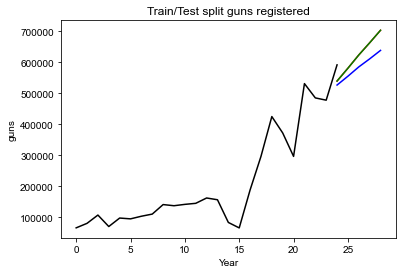

In [82]:
prediction = model.predict()
prediction
prediction.forecast.set_index(pd.Index(list(np.arange(24,29))),inplace=True)
forecastdfnew2 = prediction.upper_forecast
prediction.upper_forecast.set_index(pd.Index(list(np.arange(24,29))),inplace=True)
forecastdfnew = prediction.forecast
prediction.lower_forecast.set_index(pd.Index(list(np.arange(24,29))),inplace=True)
forecastdfnew3 = prediction.upper_forecast

plt.plot(dataweapall['ATF_Form_2'], color = "black")
plt.plot(forecastdfnew2['ATF_Form_2'], color='red')
plt.plot(forecastdfnew['ATF_Form_2'], color='blue')
plt.plot(forecastdfnew3['ATF_Form_2'], color='green')
plt.title("Train/Test split guns registered")
plt.ylabel("guns")
plt.xlabel('Year')
sns.set()
plt.show()

In [83]:
# forecast 3 seems to follow tredn best

# make a new dataframe finished and update the file below to folder, then go and run the model again with updated data frame

# check results, but everything should be the same

In [84]:
finfore = pd.DataFrame({'Calendar_Year':list(np.arange(2015,2019)), 'ATF_Form_2':list(forecastdfnew3['ATF_Form_2'].values)[1:]})

In [85]:
finweap = pd.concat([dataweapall, finfore],axis=0,ignore_index=True)

In [86]:
finweap = finweap[finweap['Calendar_Year']>=2002]

In [88]:
finweap

,Calendar_Year,ATF_Form_2
12,2002,162321.000000
13,2003,156620.000000
14,2004,83483.000000
15,2005,65865.000000
16,2006,188134.000000
17,2007,296267.000000
18,2008,424743.000000
19,2009,371920.000000
20,2010,296375.000000
21,2011,530953.000000


In [87]:
finweap.to_csv(r'C:\Users\leube\Ironhack\Ironprojects\Module_3\final_project\the-dark-side-of-social-media-\clean_data\weapons_US_cleaned_2.csv')